In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# from torch.autograd import Variable

In [4]:
# Specify the Mean and standard deviation of all the pixels in the MNIST dataset. They are precomputed  指定MNIST数据集中所有像素的均值和标准差。它们是预先计算好的
mean_gray = 0.1307
stddev_gray = 0.3081

#Transform the images to tensors 将图像转换为张量
#Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn)  使用均值和标准差对张量图像进行归一化。给定均值: (M1,...,Mn) 和标准差: (S1,..,Sn)
#for n channels, this transform will normalize each channel of the input torch.Tensor 对于n个通道，此变换将归一化输入torch.Tensor的每个通道
#i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]

transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((mean_gray,), (stddev_gray,))])

#Load our dataset
train_dataset = datasets.MNIST(root = './data',
                            train = True,
                            transform = transforms,
                            download = True)

test_dataset = datasets.MNIST(root = './data',
                            train = False,
                            transform = transforms,
                              download = True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.42MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 代码逐行解释：
1. `mean_gray = 0.1307`：指定MNIST数据集中所有像素的均值，值为0.1307。
2. `stddev_gray = 0.3081`：指定MNIST数据集中所有像素的标准差，值为0.3081。
3. `transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean_gray,), (stddev_gray,))])`：
   - `transforms.Compose`：将多个变换组合在一起。
   - `transforms.ToTensor()`：将图像转换为PyTorch张量。
   - `transforms.Normalize((mean_gray,), (stddev_gray,))`：使用指定的均值和标准差对图像进行归一化处理。


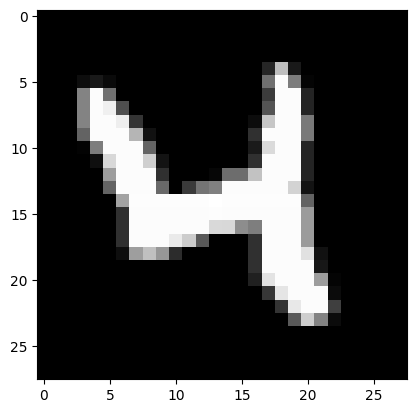

In [5]:
import matplotlib.pyplot as plt
random_image = train_dataset[20][0].numpy() * stddev_gray + mean_gray #[20][0] - 这里0 =  image, 1 = label
plt.imshow(random_image.reshape(28, 28), cmap='gray')
# plt.title('Random Image from MNIST Dataset')
# plt.xlabel('Pixel X')
# plt.ylabel('Pixel Y')
# plt.show()

```python
import matplotlib.pyplot as plt

# 从训练数据集中获取第20个样本的图像，并进行反归一化处理
random_image = train_dataset[20][0].numpy() * stddev_gray + mean_gray

# 显示图像，使用灰度颜色映射
plt.imshow(random_image.reshape(28, 28), cmap='gray')
```

### 代码逐行解释：
1. `import matplotlib.pyplot as plt`：导入`matplotlib.pyplot`模块，用于绘制图像。
2. `random_image = train_dataset[20][0].numpy() * stddev_gray + mean_gray`：
   - 从`train_dataset`中获取第20个样本的图像（假设`train_dataset`是一个包含图像数据的PyTorch数据集）。
   - `[20][0]`：获取第20个样本的图像数据（假设图像数据在第一个位置）。
   - `.numpy()`：将PyTorch张量转换为NumPy数组。
   - `* stddev_gray + mean_gray`：对图像进行反归一化处理，以恢复原始像素值。
3. `plt.imshow(random_image.reshape(28, 28), cmap='gray')`：
   - `random_image.reshape(28, 28)`：将图像数据重新调整为28x28的形状。
   - `plt.imshow(..., cmap='gray')`：使用灰度颜色映射显示图像。


In [6]:
print(train_dataset[20][1])   #Print the corresponding label for the image

4


In [7]:
#Make the dataset iterable
batch_size = 100

train_load = torch.utils.data.DataLoader(dataset = train_dataset,
                                         batch_size = batch_size,
                                         shuffle = True)

test_load = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

### 代码逐行解释：
1. `batch_size = 100`：设置每个批次的大小为100。
2. `train_load = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)`：
   - `torch.utils.data.DataLoader`：创建一个数据加载器，使数据集可迭代。
   - `dataset=train_dataset`：指定要加载的训练数据集。
   - `batch_size=batch_size`：指定每个批次的大小。
   - `shuffle=True`：在每个epoch开始时打乱数据集。
3. `test_load = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)`：
   - `torch.utils.data.DataLoader`：创建一个数据加载器，使数据集可迭代。
   - `dataset=test_dataset`：指定要加载的测试数据集。
   - `batch_size=batch_size`：指定每个批次的大小。
   - `shuffle=False`：不打乱测试数据集。

创建数据加载器的目的是为了更高效和方便地处理数据集，特别是在训练和测试深度学习模型时。以下是使用数据加载器而不是直接使用数据集的一些主要原因：

### 1. 批量处理（Batch Processing）
数据加载器允许我们将数据集分成多个小批次（batch），每个批次包含一定数量的样本。批量处理有以下几个优点：
- **内存效率**：一次只加载一个批次的数据，而不是整个数据集，这样可以节省内存。
- **加速训练**：批量处理可以利用矩阵运算的优势，加速模型的训练过程。

### 2. 数据打乱（Shuffling）
在训练过程中，数据加载器可以在每个epoch开始时打乱数据集。这有助于：
- **防止过拟合**：打乱数据可以防止模型记住数据的顺序，从而提高模型的泛化能力。
- **提高训练效果**：打乱数据可以使模型在训练过程中更好地学习数据的分布。

### 3. 多线程数据加载（Multi-threaded Data Loading）
数据加载器可以使用多线程或多进程来并行加载数据，从而提高数据加载的效率。这对于大型数据集尤其重要，因为数据加载可能成为训练过程中的瓶颈。

### 4. 数据预处理（Data Preprocessing）
数据加载器可以在加载数据的同时进行数据预处理，例如数据增强、归一化等。这使得数据预处理过程更加高效和方便。

### 代码示例：
以下是一个简单的示例，展示了如何使用数据加载器进行批量处理和数据打乱：

```python
import torch
from torch.utils.data import DataLoader, TensorDataset

# 创建一个简单的数据集
data = torch.randn(1000, 3)  # 1000个样本，每个样本有3个特征
labels = torch.randint(0, 2, (1000,))  # 1000个标签，二分类

# 将数据和标签打包成一个数据集
dataset = TensorDataset(data, labels)

# 创建数据加载器
batch_size = 100
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 迭代数据加载器
for batch_data, batch_labels in data_loader:
    # 在这里进行训练或测试
    print(batch_data.shape, batch_labels.shape)
```

在这个示例中，数据加载器将数据集分成了多个批次，每个批次包含100个样本，并在每个epoch开始时打乱数据集。

### 总结：
使用数据加载器而不是直接使用数据集，可以提高数据处理的效率和灵活性，特别是在处理大型数据集和进行深度学习训练时。数据加载器提供了批量处理、数据打乱、多线程数据加载和数据预处理等功能，使得数据处理过程更加高效和方便。

In [8]:
print('There are {} images in the training set'.format(len(train_dataset)))
print('There are {} images in the test set'.format(len(test_dataset)))
print('There are {} batches in the train loader'.format(len(train_load)))
print('There are {} batches in the testloader'.format(len(test_load)))

There are 60000 images in the training set
There are 10000 images in the test set
There are 600 batches in the train loader
There are 100 batches in the testloader


![cnn mnist](https://user-images.githubusercontent.com/30661597/61713471-3c957d00-ad8b-11e9-9a38-e3f4d1e72565.png)

In [9]:
#Create the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        #Same Padding = [(filter size - 1) / 2] (Same Padding--> input size = output size)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3,stride=1, padding=1) #in_channels=1 是因为灰度图一个通道, 如果是RGB, 就得写3
        #The output size of each of the 8 feature maps is
        #[(input_size - filter_size + 2(padding) / stride) +1] --> [(28-3+2(1)/1)+1] = 28 (padding type is same) - input size =28 (as 28*28 image)
        #Batch normalization
        self.batchnorm1 = nn.BatchNorm2d(8)
        #RELU
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        #After max pooling, the output of each feature map is now 28/2 = 14 also is next input size
        # same padding = (5-1)/2 = 2
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        #Output size of each of the 32 feature maps remains 14 [(14-5+2*2)/1+1]
        self.batchnorm2 = nn.BatchNorm2d(32)
        #After max pooling, the output of each feature map is 14/2 = 7
        #Flatten the feature maps. You have 32 feature maps, each of them is of size 7x7 --> 32*7*7 = 1568
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.droput = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=600, out_features=10) # 因为我们有 10 个class,再次，我们预测 10 个不同的数字。因此类别的数量，或者输出神经元的数量,第二个全连接层的大小为 10。
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        #Now we have to flatten the output. This is where we apply the feed forward neural network as learned before!
        #It will take the shape (batch_size, 1568) = (100, 1568)
        out = out.view(-1,1568) # -1 当你提供 -1 时，PyTorch, 将在这里计算出其余的值。
        #Then we forward through our fully connected layer
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

### 代码逐行解释：
1. `class CNN(nn.Module):`：定义一个继承自`nn.Module`的卷积神经网络类。
2. `def __init__(self):`：初始化方法，定义网络的层。
3. `super(CNN, self).__init__()`：调用父类的初始化方法。
4. `self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)`：定义第一个卷积层，输入通道为1，输出通道为8，卷积核大小为3x3，步幅为1，填充为1。
5. `self.batchnorm1 = nn.BatchNorm2d(8)`：定义第一个批量归一化层，输入通道为8。
6. `self.relu = nn.ReLU()`：定义ReLU激活函数。
7. `self.maxpool = nn.MaxPool2d(kernel_size=2)`：定义最大池化层，池化窗口大小为2x2。
8. `self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)`：定义第二个卷积层，输入通道为8，输出通道为32，卷积核大小为5x5，步幅为1，填充为2。
9. `self.batchnorm2 = nn.BatchNorm2d(32)`：定义第二个批量归一化层，输入通道为32。
10. `self.fc1 = nn.Linear(in_features=1568, out_features=600)`：定义第一个全连接层，输入特征数为1568，输出特征数为600。
11. `self.dropout = nn.Dropout(p=0.5)`：定义Dropout层，丢弃概率为0.5。
12. `self.fc2 = nn.Linear(in_features=600, out_features=10)`：定义第二个全连接层，输入特征数为600，输出特征数为10。
13. `def forward(self, x):`：定义前向传播方法。
14. `out = self.cnn1(x)`：通过第一个卷积层。
15. `out = self.batchnorm1(out)`：通过第一个批量归一化层。
16. `out = self.relu(out)`：通过ReLU激活函数。
17. `out = self.maxpool(out)`：通过最大池化层。
18. `out = self.cnn2(out)`：通过第二个卷积层。
19. `out = self.batchnorm2(out)`：通过第二个批量归一化层。
20. `out = self.relu(out)`：通过ReLU激活函数。
21. `out = self.maxpool(out)`：通过最大池化层。
22. `out = out.view(-1, 1568)`：展平输出。
23. `out = self.fc1(out)`：通过第一个全连接层。
24. `out = self.relu(out)`：通过ReLU激活函数。
25. `out = self.dropout(out)`：通过Dropout层。
26. `out = self.fc2(out)`：通过第二个全连接层。
27. `return out`：返回输出。

In [16]:
torch.cuda.is_available()

False

In [10]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()
loss_fn = nn.CrossEntropyLoss()
# Show weight decay
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #定义优化器，使用随机梯度下降（SGD）优化器，并设置学习率为0.01

In [11]:
#Understand what's happening
iteration = 0
correct = 0

for i,(inputs,labels) in enumerate (train_load): ## 遍历训练数据加载器中的每个批次

    if CUDA:
        inputs = inputs.cuda()
        labels = labels.cuda()

    print("For one iteration, this is what happens:")
    #Each tensor propagated through the network should be 4D (batch_size, channels, rows, cols)
    print("Input Shape:",inputs.shape)
    print("Labels Shape:",labels.shape)
    output = model(inputs)
    print("Outputs Shape",output.shape)
    _, predicted = torch.max(output, 1)
    print("Predicted Shape",predicted.shape)
    print("Predicted Tensor:")
    print(predicted)
    correct += (predicted == labels).sum()
    break

For one iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Outputs Shape torch.Size([100, 10])
Predicted Shape torch.Size([100])
Predicted Tensor:
tensor([4, 4, 7, 8, 9, 9, 7, 7, 4, 5, 8, 4, 7, 7, 4, 4, 8, 1, 1, 8, 7, 7, 4, 9,
        7, 4, 1, 0, 4, 1, 8, 4, 1, 5, 8, 8, 7, 8, 8, 5, 4, 4, 7, 7, 9, 7, 8, 7,
        4, 7, 8, 8, 9, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 1, 8, 7, 9, 8, 5, 7, 8, 9,
        8, 4, 7, 9, 7, 5, 9, 9, 8, 6, 4, 8, 7, 7, 8, 5, 7, 7, 1, 4, 7, 7, 7, 7,
        1, 7, 9, 8])


下面是打印输出结果的解释，每个参数代表的含义如下：

### 1. `Input Shape: torch.Size([100, 1, 28, 28])`
- **Input Shape**：输入数据的形状。
- **torch.Size([100, 1, 28, 28])**：
  - `100`：批次大小（batch size），表示每个批次包含100个样本。
  - `1`：输入通道数，对于MNIST数据集，图像是灰度图，所以通道数为1。
  - `28`：图像的高度。
  - `28`：图像的宽度。

### 2. `Labels Shape: torch.Size([100])`
- **Labels Shape**：标签数据的形状。
- **torch.Size([100])**：
  - `100`：批次大小（batch size），表示每个批次包含100个标签。

### 3. `Outputs Shape torch.Size([100, 10])`
- **Outputs Shape**：模型输出的形状。
- **torch.Size([100, 10])**：
  - `100`：批次大小（batch size），表示每个批次包含100个样本的输出。
  - `10`：输出的特征数，对于MNIST数据集，有10个类别（数字0到9），所以输出特征数为10。

### 4. `Predicted Shape torch.Size([100])`
- **Predicted Shape**：预测结果的形状。
- **torch.Size([100])**：
  - `100`：批次大小（batch size），表示每个批次包含100个预测结果。

### 5. `Predicted Tensor`
- **Predicted Tensor**：预测结果的张量。
- **tensor([...])**：包含100个预测结果，每个结果是一个类别索引（0到9）。

### 具体解释：
- **Input Shape**：表示输入到模型中的图像数据的形状，每个批次包含100张28x28的灰度图像。
- **Labels Shape**：表示输入到模型中的标签数据的形状，每个批次包含100个标签。
- **Outputs Shape**：表示模型输出的形状，每个批次包含100个样本的输出，每个输出有10个特征（对应10个类别的概率）。
- **Predicted Shape**：表示模型预测结果的形状，每个批次包含100个预测结果。
- **Predicted Tensor**：表示模型预测的类别索引，每个索引对应一个类别（0到9）。

In [12]:
#Training the CNN
num_epochs = 25

#Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#Training
for epoch in range(num_epochs):
    #Reset these below variables to 0 at the begining of every epoch
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train()                   # Put the network into training mode 现在我们需要将模型设置为训练模式，因此 model.train。现在，我们之所以需要这样做，是因为我们使用了 dropouts和批量标准化。如果你回到课堂，在这里，
    #你可以看到我们使用了 dropouts以及批量标准化。现在，记得我们在理论部分讨论过，这两者在训练和测试中的表现不同。举个例子，在 dropouts 中，当你使用 dropout 时，然后在测试的时候，你需要为了扩大激活范围，为了补偿训练。所以他们在训练和测试中的表现不同。
    # 这就是为什么我们需要明确或者告诉 PyTorch 我们何时训练、何时测试。

    for i, (inputs, labels) in enumerate(train_load):

        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()

        outputs = model(inputs)         #前向传播
        loss = loss_fn(outputs, labels)   # 计算损失
        iter_loss += loss.item()         # Accumulate the loss , due to here loss is a tensor. loss.item() 获取内容, 累计损失
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient) 清楚梯度
        loss.backward()                 # Backpropagation 反向传播
        optimizer.step()                # Update the weights 更新权重

        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        iterations += 1

    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))

    #Testing
    testing_loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation mode 将网络置于评估模式
    # 现在，我们的训练已经结束。这意味着我们想告诉 PyTorch这是测试阶段,为了实现 dropout 批量标准化,以测试模式运行。所以我们需要做的就是model.eval()。

    for i, (inputs, labels) in enumerate(test_load):

        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels) # Calculate the loss
        testing_loss += loss.item()
        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()

        iterations += 1

    # Record the Testing loss
    test_loss.append(testing_loss/iterations)
    # Record the Testing accuracy
    test_accuracy.append((100 * correct / len(test_dataset)))

    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
           .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1],
             test_loss[-1], test_accuracy[-1])) #记住，每次我们完成一个时代，我们将该值附加到此列表中。所以我们要做的就是提取最后一个值

Epoch 1/25, Training Loss: 0.486, Training Accuracy: 87.420, Testing Loss: 0.154, Testing Acc: 95.770
Epoch 2/25, Training Loss: 0.163, Training Accuracy: 95.398, Testing Loss: 0.095, Testing Acc: 97.330
Epoch 3/25, Training Loss: 0.118, Training Accuracy: 96.645, Testing Loss: 0.073, Testing Acc: 97.960
Epoch 4/25, Training Loss: 0.094, Training Accuracy: 97.257, Testing Loss: 0.062, Testing Acc: 98.170
Epoch 5/25, Training Loss: 0.080, Training Accuracy: 97.647, Testing Loss: 0.054, Testing Acc: 98.390
Epoch 6/25, Training Loss: 0.071, Training Accuracy: 97.905, Testing Loss: 0.047, Testing Acc: 98.610
Epoch 7/25, Training Loss: 0.064, Training Accuracy: 98.108, Testing Loss: 0.045, Testing Acc: 98.550
Epoch 8/25, Training Loss: 0.058, Training Accuracy: 98.252, Testing Loss: 0.044, Testing Acc: 98.690
Epoch 9/25, Training Loss: 0.055, Training Accuracy: 98.382, Testing Loss: 0.039, Testing Acc: 98.690
Epoch 10/25, Training Loss: 0.051, Training Accuracy: 98.453, Testing Loss: 0.036,

### 代码逐行解释：
1. `num_epochs = 25`：设置训练的总轮数为25。
2. `train_loss = []`，`test_loss = []`，`train_accuracy = []`，`test_accuracy = []`：定义列表来存储每个epoch的训练和测试损失及准确率。
3. `for epoch in range(num_epochs):`：遍历每个epoch。
4. `correct = 0`，`iterations = 0`，`iter_loss = 0.0`：在每个epoch开始时将这些变量重置为0。
5. `model.train()`：将模型置于训练模式。
6. `for i, (inputs, labels) in enumerate(train_load):`：遍历训练数据加载器中的每个批次。
7. `if CUDA:`：如果有可用的CUDA设备，将输入和标签移动到GPU。
8. `outputs = model(inputs)`：通过模型进行前向传播，获取输出。
9. `loss = loss_fn(outputs, labels)`：计算损失。
10. `iter_loss += loss.item()`：累积损失。
11. `optimizer.zero_grad()`：清除梯度。
12. `loss.backward()`：进行反向传播。
13. `optimizer.step()`：更新权重。
14. `_, predicted = torch.max(outputs, 1)`：获取预测结果。
15. `correct += (predicted == labels).sum()`：记录正确预测的数量。
16. `iterations += 1`：记录迭代次数。
17. `train_loss.append(iter_loss / iterations)`：记录训练损失。
18. `train_accuracy.append((100 * correct / len(train_dataset)))`：记录训练准确率。
19. `testing_loss = 0.0`，`correct = 0`，`iterations = 0`：在测试开始时将这些变量重置为0。
20. `model.eval()`：将模型置于评估模式。
21. `for i, (inputs, labels) in enumerate(test_load):`：遍历测试数据加载器中的每个批次。
22. `if CUDA:`：如果有可用的CUDA设备，将输入和标签移动到GPU。
23. `outputs = model(inputs)`：通过模型进行前向传播，获取输出。
24. `loss = loss_fn(outputs, labels)`：计算损失。
25. `testing_loss += loss.item()`：累积测试损失。
26. `_, predicted = torch.max(outputs, 1)`：获取预测结果。
27. `correct += (predicted == labels).sum()`：记录正确预测的数量。
28. `iterations += 1`：记录迭代次数。
29. `test_loss.append(testing_loss / iterations)`：记录测试损失。
30. `test_accuracy.append((100 * correct / len(test_dataset)))`：记录测试准确率。
31. `print('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Accuracy: {:.3f}' .format(epoch + 1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))`：打印每个epoch的训练和测试损失及准确率。


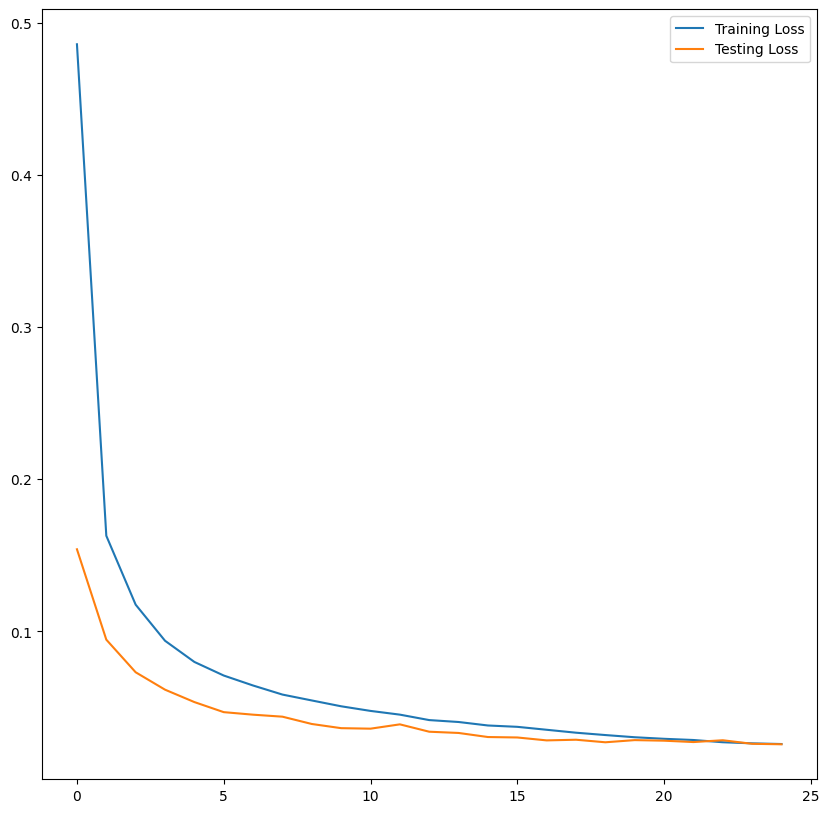

In [13]:
# Loss
f = plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.show()

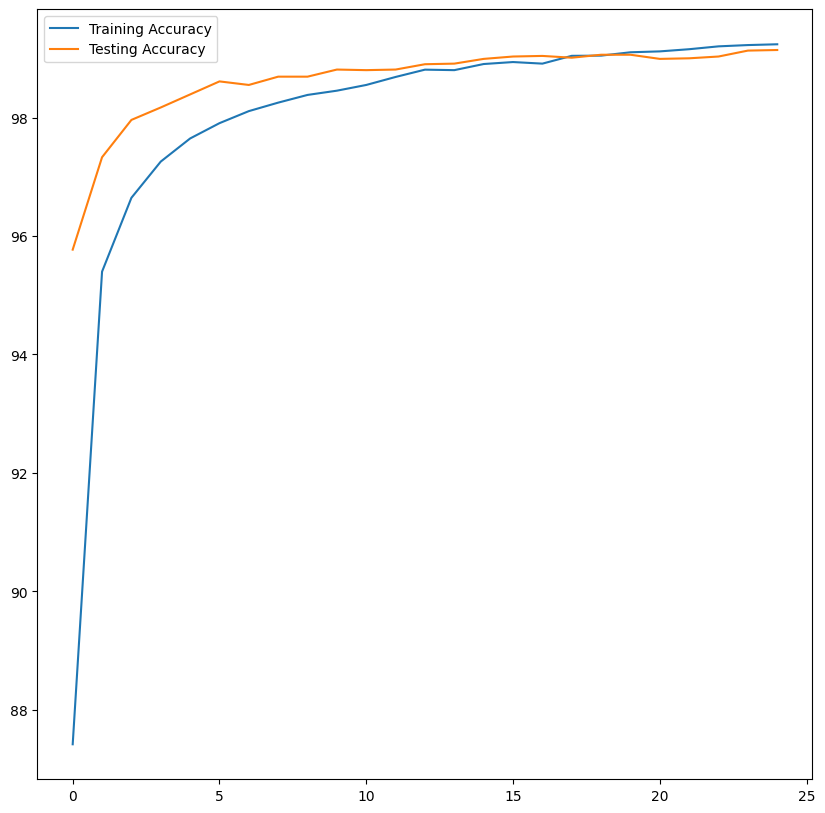

In [14]:
# Accuracy
f = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.show()

In [15]:
img = test_dataset[30][0].resize_((1, 1, 28, 28))   #(batch_size,channels,height,width)
label = test_dataset[30][1]

model.eval()

if CUDA:
    model = model.cuda()
    img = img.cuda()

output = model(img)
_, predicted = torch.max(output,1)
print("Prediction is: {}".format(predicted.item()))
print("Actual is: {}".format(label))

Prediction is: 3
Actual is: 3
